**Lab Task 1**: Plot all the given functions to observe the roots by visualization, fill the table by your visual guess of root. We have plotted one function for you.</br>
1) $f(x)=cos(x)-1.3x$</br>
2) $f(x)=xcos(x)-2x^2+3x-1$</br>
3) $f(x)=2xcos(2x)-(x+1)^2$





In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 7.50]

def f(x):
    return (np.cos(x)-(1.3*x))

x = np.linspace(-10,10 , 1000)
plt.plot(x,f(x), color='red')
plt.hlines(y=0,xmin=-10,xmax=10,color='blue')
plt.show()


ModuleNotFoundError: No module named 'numpy'

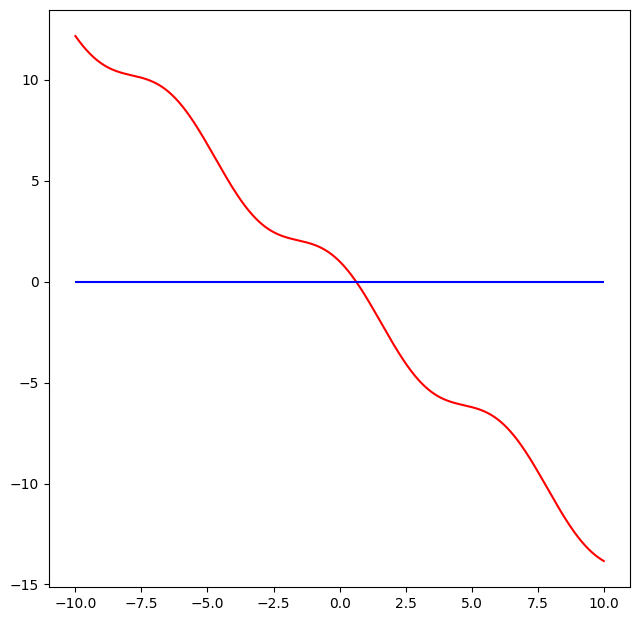

In [28]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 7.50]

def f(x):
    return (np.cos(x)-1.3*x)

x = np.linspace(-10,10 , 1000)
plt.plot(x,f(x), color='red')
plt.hlines(y=0,xmin=-10,xmax=10,color='blue')
plt.show()


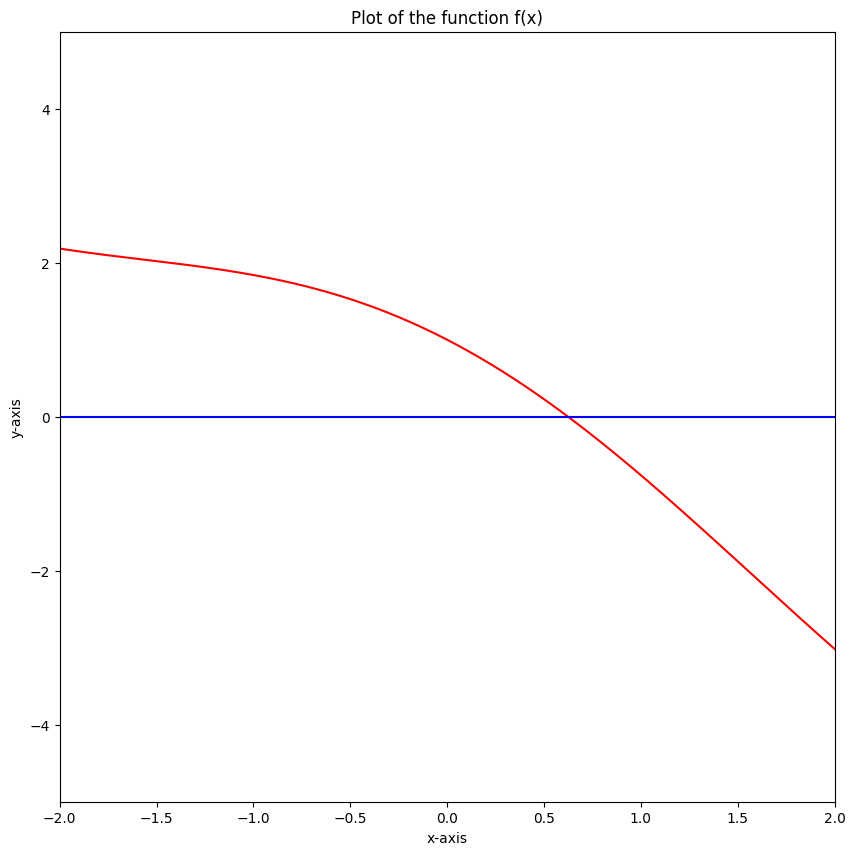

In [26]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [10, 10]  # Increased figure size

def f(x):
    return (np.cos(x) - 1.3 * x)

x = np.linspace(-10, 10, 1000)
plt.plot(x, f(x), color='red')

# Adding space around the plot
plt.xlim(-2, 2)
plt.ylim(-5, 5)

plt.hlines(y=0, xmin=-10, xmax=10, color='blue')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot of the function f(x)')

plt.show()

**Lab Task 2**: Complete the missing code of bisection method accordding to the explained algorithm and find root of given problems by bisection method according to the instructions given in table.</br>
1) $f1(x)=cos(x)-1.3x$</br>
2) $f2(x)=xcos(x)-2x^2+3x-1$</br>
3) $f3(x)=2xcos(2x)-(x+1)^2$


In [42]:
import numpy as np
from tabulate import tabulate

def func(x):
    return (np.cos(x) - 1.3 * x)

def bisection(func, x1, x2, tol=0.001, max_iter=100):
    if func(x1) * func(x2) >= 0:
        return  "Error: Choose different interval, function should have different signs at the interval endpoints."
    data=[]
    iter = 0
    xr = x2
    error = tol + 1

    while iter < max_iter and error > tol:
        xrold = xr
        xr = ((x1+x2)/2)
        iter += 1
        error = abs((xr - xrold) )

        test = func(x1) * func(xr)
        # write your code here to replace value of x1 or x2 by xr
        if test < 0:
            x2 = xr
        elif test > 0:
            x1 = xr
        else:
            error = 0

        data.append([iter+1,x1,func(x1),x2,func(x2),xr,func(xr),error])
    print(tabulate(data,headers=['#','x1','f(x1)','x2','f(x2)','xr','f(xr)',"error"],tablefmt="github"))
    print('\nRoot of given function is x=%.9f in n=%d number of iterations with a tolerence=%.4f' %(xr,iter,tol))
    return
bisection(func,0,10)

|   # |       x1 |       f(x1) |      x2 |       f(x2) |       xr |        f(xr) |       error |
|-----|----------|-------------|---------|-------------|----------|--------------|-------------|
|   2 | 0        | 1           | 5       | -6.21634    | 5        | -6.21634     | 5           |
|   3 | 0        | 1           | 2.5     | -4.05114    | 2.5      | -4.05114     | 2.5         |
|   4 | 0        | 1           | 1.25    | -1.30968    | 1.25     | -1.30968     | 1.25        |
|   5 | 0        | 1           | 0.625   | -0.00153688 | 0.625    | -0.00153688  | 0.625       |
|   6 | 0.3125   | 0.545318    | 0.625   | -0.00153688 | 0.3125   |  0.545318    | 0.3125      |
|   7 | 0.46875  | 0.282759    | 0.625   | -0.00153688 | 0.46875  |  0.282759    | 0.15625     |
|   8 | 0.546875 | 0.143216    | 0.625   | -0.00153688 | 0.546875 |  0.143216    | 0.078125    |
|   9 | 0.585938 | 0.0714753   | 0.625   | -0.00153688 | 0.585938 |  0.0714753   | 0.0390625   |
|  10 | 0.605469 | 0.035126   

**Lab Task 3**: Find root of given problems by Newton Raphson method according to the instructions given in table.</br>
1) $f1(x)=cos(x)-1.3x$</br>
2) $f2(x)=xcos(x)-2x^2+3x-1$</br>
3) $f3(x)=2xcos(2x)-(x+1)^2$


In [43]:
import numpy as np
from tabulate import tabulate

## module Newton_Raphson
''' newton_raphson(func, dfunc, x0, tol=1e-4, max_iter=1000)
    Finds a root of f(x) = 0 by newton_raphson.
'''
def func(x):
    return (np.cos(x) - 1.3 * x)
def dfunc(x):
    return (-np.sin(x) - 1.3)
def newton_raphson(func, dfunc, x0, tol=0.001, max_iter=1000):
    xr = x0
    data=[]
    iter = 0
    error = tol + 1
    for i in range(max_iter):
        iter+=1
        fx = func(xr)
        dx = dfunc(xr)
        if abs(dx) < tol:
           raise Exception("Derivative is close to zero!")
        xrold=xr
        xr = xr - fx/dx
        error=abs(xr-xrold)
        data.append([iter,xr,func(xr),error])
        if error < tol:
           print(tabulate(data,headers=['Iteration','xr','f(xr)',"error"],tablefmt="github"))
           print('\nRoot of given function is x=%.9f in n=%d number of iterations with a tolerence=%.4f' %(xr,iter,tol))
           return

    raise Exception("Max iterations reached")
newton_raphson(func,dfunc,100)


|   Iteration |         xr |        f(xr) |         error |
|-------------|------------|--------------|---------------|
|           1 | -62.7168   | 82.5253      | 162.717       |
|           2 |  -4.38486  |  5.37861     |  58.332       |
|           3 |  -1.991    |  2.18035     |   2.39386     |
|           4 |   3.64306  | -5.61285     |   5.63406     |
|           5 |  -3.20781  |  3.17234     |   6.85086     |
|           6 |  -0.885731 |  1.78417     |   2.32208     |
|           7 |   2.50867  | -4.06758     |   3.39441     |
|           8 |   0.358222 |  0.470832    |   2.15045     |
|           9 |   0.64347  | -0.0364922   |   0.285248    |
|          10 |   0.624263 | -0.000148266 |   0.0192067   |
|          11 |   0.624185 | -2.51131e-09 |   7.86765e-05 |

Root of given function is x=0.624184579 in n=11 number of iterations with a tolerence=0.0010


**Lab Task 4**: Find root of given problems by using fsolve command of scipy.optimize</br>
1) $f1(x)=cos(x)-1.3x$</br>
2) $f2(x)=xcos(x)-2x^2+3x-1$</br>
3) $f3(x)=2xcos(2x)-(x+1)^2$


**Lab Task 5**: Write program of Secant and False Position method by altering above codes.